<p><b>Applied Computational Science I</b></p>
<h1 style="margin:0px">Lab: Linear Algebra: Google PageRank</h1>
<br/>
<p>Anand Kamble</p>
<a href="mailto:amk23j@fsu.edu">amk23j@fsu.edu</a>
<p>3rd October 2023</p>
<hr style="border:2px solid gray"/>

In [7]:
# Importing required packages.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from IPython.display import Markdown, display, Latex

In [39]:
# Helper functions
def np_array_to_latex(arr, title = ""):
    latex_str = np.array2string(arr, separator=' & ', formatter={'float': lambda x: f"{x:.8f}"}, suppress_small=True)
    latex_str = latex_str.replace('[', '$\\begin{bmatrix}')
    latex_str = latex_str.replace(']', '\\end{bmatrix}$')
    return title + latex_str


<hr style="border:2px solid gray"/><br/><br/>

#### Adjacency Matrix 

A function which will create an adjacency matrix of given dimensions.

In [2]:
# Function which creates the matrix with given dimensions.
def create_matrix(n):
    A = np.random.randint(0, 2, (n, n))
    np.fill_diagonal(A, 0)
    while np.any(np.sum(A, axis=0) == 0):
        A = np.random.randint(0, 2, (n, n))
        np.fill_diagonal(A, 0)
    return A

<hr style="border:2px solid gray"/><br/><br/>

#### Method 1
$$(I - dM)R = {{1 - d} \over n}1$$


In [3]:
# Method 1 to find the page ranks.
def Method_1(A, d=0.85):
    n = A.shape[0]
    M = A / np.sum(A, axis=0)
    R = np.linalg.solve(np.eye(n) - d * M, (1 - d) / n * np.ones(n))
    return R

<hr style="border:2px solid gray"/><br/><br/>

#### Method 2
$$ R = (dM + {{1 - d}\over n}E)R $$
$$ = \hat{M} R$$

In [4]:
def Method_2(A, d=0.85, tol=1e-6, max_iter=100):
    n = A.shape[0]
    M = A / np.sum(A, axis=0)
    M_hat = d * M + (1 - d) / n * np.ones((n, n))
    R = np.ones(n) / n
    for _ in range(max_iter):
        R_next = M_hat @ R
        if np.linalg.norm(R_next - R) < tol:
            break
        R = R_next
    return R

<hr style="border:2px solid gray"/><br/><br/>

Assuming $n=10$, we can find the page ranks by both methods as follows,

In [40]:
n = 10
A = create_matrix(n)
r1 = Method_1(A)
r2 = Method_2(A)

display(Markdown("The value of R calculated by <b>method 1</b> is,"))
display(Latex( "$R_{1} =\ $" + np_array_to_latex(r1)))
display(Markdown("The value of R calculated by <b>method 2</b> is,"))
display(Latex( "$R_{2} =\ $" + np_array_to_latex(r2)))


The value of R calculated by <b>method 1</b> is,

<IPython.core.display.Latex object>

The value of R calculated by <b>method 2</b> is,

<IPython.core.display.Latex object>

<hr style="border:2px solid gray"/><br/><br/>

Using the same methods, we can substitute $n = 5, 10, 50, 100, 500, 1000, 2000, 5000$ and calculate the computational costs for both methods.

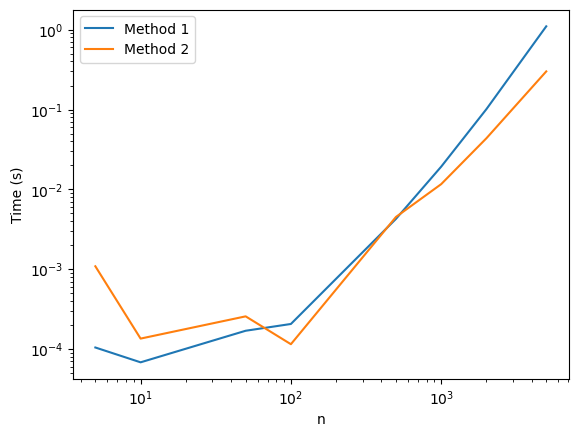

In [41]:
def Measure_time(n_values):
    method_1_times = []
    method_2_times = []

    for n in n_values:
        A = create_matrix(n)
        method_1_times.append(timeit.Timer(lambda: Method_1(A)).timeit(number=1))
        method_2_times.append(timeit.Timer(lambda: Method_2(A)).timeit(number=1))

    return method_1_times, method_2_times


# Values of n.
n_values = [5, 10, 50, 100, 500, 1000, 2000, 5000]
# Measuring time taken for all values of n.
method_1_times, method_2_times = Measure_time(n_values)

plt.loglog(n_values, method_1_times, label="Method 1")
plt.loglog(n_values, method_2_times, label="Method 2")
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.legend()
plt.show()
